In [1]:
# 01_data_exploration.ipynb

# 1. Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 2. Load dataset
df = pd.read_csv("../data/wildlife_mock.csv")  # adjust path if needed
print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
df.head()

Dataset loaded successfully!
Shape: (1000000, 5)


,State,Month,Year,Incident,Animal
0,Karnataka,11,2020,Wild animal entering populated area,Crocodile
1,Maharashtra,6,2018,Illegal trade,Leopard
2,Rajasthan,8,2020,Conflict with humans,Bear
3,Uttar Pradesh,2,2021,Poaching,Wild Boar
4,Uttar Pradesh,5,2022,Wild animal entering populated area,Bear


In [3]:
# 3. Basic info
print("\n--- Info ---")
print(df.info())

print("\n--- Missing values ---")
print(df.isnull().sum())

print("\n--- Descriptive statistics ---")
print(df.describe(include='all'))


--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   State     1000000 non-null  object
 1   Month     1000000 non-null  int64 
 2   Year      1000000 non-null  int64 
 3   Incident  1000000 non-null  object
 4   Animal    1000000 non-null  object
dtypes: int64(2), object(3)
memory usage: 38.1+ MB
None

--- Missing values ---
State       0
Month       0
Year        0
Incident    0
Animal      0
dtype: int64

--- Descriptive statistics ---
            State           Month            Year  \
count     1000000  1000000.000000  1000000.000000   
unique         10             NaN             NaN   
top     Karnataka             NaN             NaN   
freq       100432             NaN             NaN   
mean          NaN        6.497522     2021.497888   
std           NaN        3.451978        2.292870   
min           NaN        1.00

In [4]:
# 4. Value counts for categorical features
print("\n--- Incident Types ---")
print(df['Incident'].value_counts())

print("\n--- Animals ---")
print(df['Animal'].value_counts())

print("\n--- States ---")
print(df['State'].value_counts())


--- Incident Types ---
Incident
Wild animal entering populated area    194513
Smuggling                              134521
Illegal trade                          134503
Poaching                               134204
Conflict with humans                   134193
Trap/Accident                          134084
Injury/Death                           133982
Name: count, dtype: int64

--- Animals ---
Animal
Elephant     154939
Deer          94150
Rhino         94143
Wild Boar     94107
Snake         94083
Monkey        94052
Tiger         93732
Bear          93728
Crocodile     93582
Leopard       93484
Name: count, dtype: int64

--- States ---
State
Karnataka         100432
Rajasthan         100339
Odisha            100331
West Bengal       100117
Maharashtra        99955
Assam              99952
Madhya Pradesh     99884
Kerala             99822
Tamil Nadu         99801
Uttar Pradesh      99367
Name: count, dtype: int64


/tmp/ipykernel_36374/2629990518.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Incident", order=df["Incident"].value_counts().index, palette="viridis")


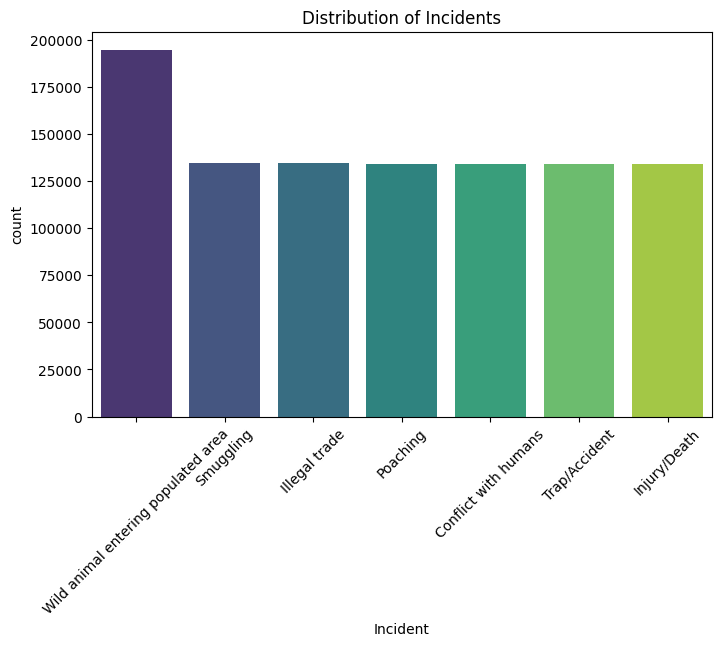

In [5]:
# 5. Visualization: Incident distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Incident", order=df["Incident"].value_counts().index, palette="viridis")
plt.xticks(rotation=45)
plt.title("Distribution of Incidents")
plt.show()

/tmp/ipykernel_36374/2261073262.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Animal", order=df["Animal"].value_counts().index, palette="magma")


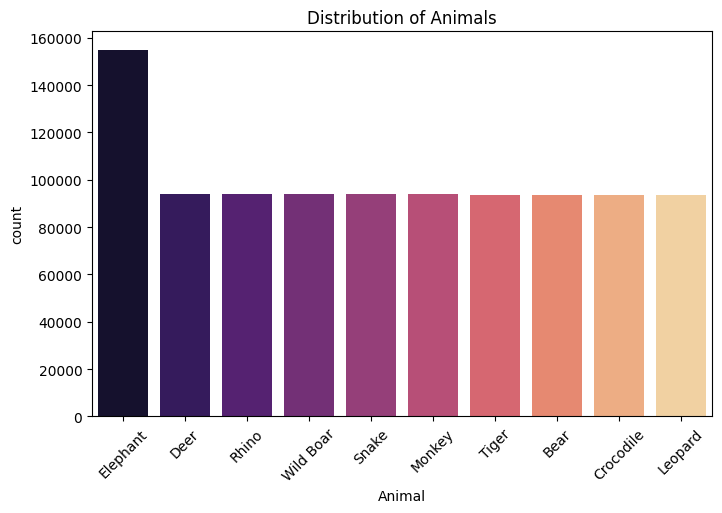

In [6]:
# 6. Visualization: Animals affected
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Animal", order=df["Animal"].value_counts().index, palette="magma")
plt.xticks(rotation=45)
plt.title("Distribution of Animals")
plt.show()

/tmp/ipykernel_36374/3819558974.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Year", palette="coolwarm")


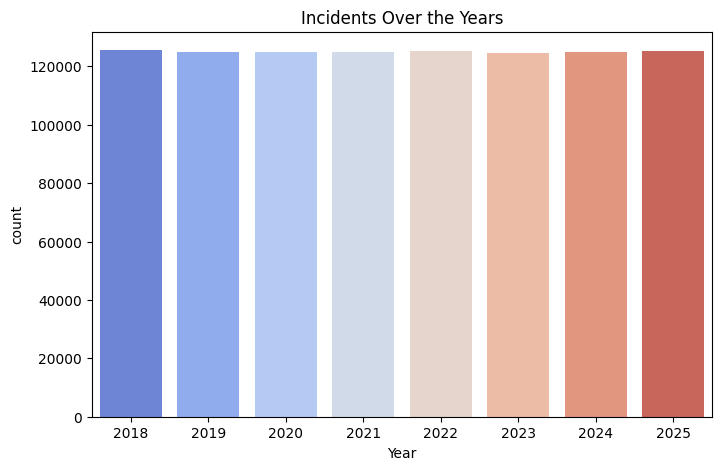

In [7]:
# 7. Visualization: Incidents by Year
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Year", palette="coolwarm")
plt.title("Incidents Over the Years")
plt.show()

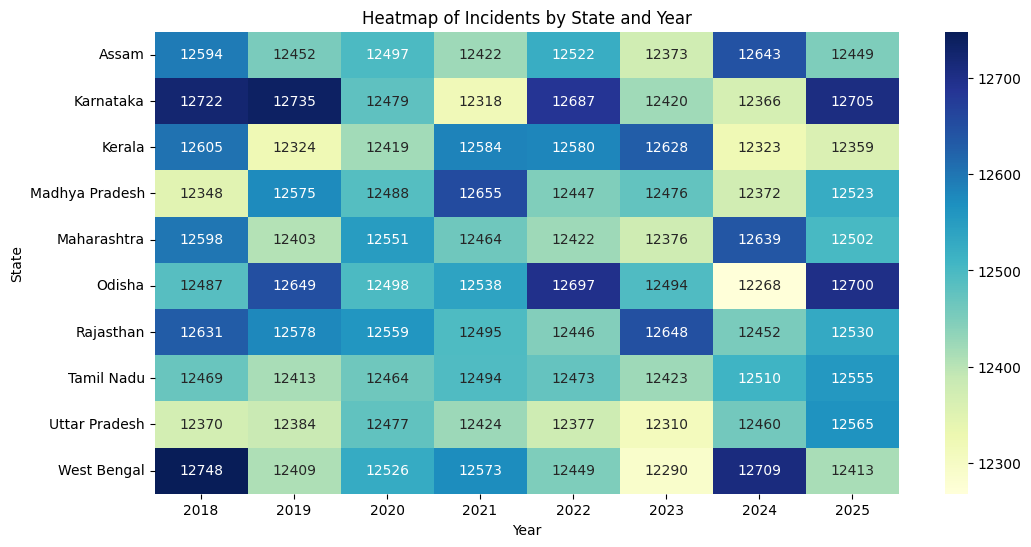

In [8]:
# 8. Visualization: Heatmap of incidents by State & Year
pivot = df.pivot_table(index="State", columns="Year", values="Incident", aggfunc="count", fill_value=0)
plt.figure(figsize=(12,6))
sns.heatmap(pivot, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Incidents by State and Year")
plt.show()